# Airline Customer Satisfaction Analysis ✈️

------------------**Team 1**-------------------



*   Manav Mangukiya
*   Aryan Khunt
*   Ramya Sree




# **-----------------Table of Content---------------**
1. Importing Libraries
2. Data Understanding
3. Data Visulization
4. Data prepration
   * Treating outliers
   * Labeling and Encoding
   * Corelation ans use of  VIF


5. Model fitting
   * Decision Tree
   * KNN
   * Naive bayes
   * SVC
   * MLP
   * Boosting
   * Bagging
   * Voting
   * Gradient Decent
   * XGBoosting
   * SHAP analysis
6. Model Comparison
7. Concllusion & Discussion

In [144]:
!pip3 install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.19 s (started: 2024-05-15 14:09:39 -07:00)


#Importing libraries

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
import shap
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

time: 1.26 ms (started: 2024-05-15 14:09:41 -07:00)


In [146]:
import warnings
warnings.filterwarnings('ignore')

time: 226 µs (started: 2024-05-15 14:09:41 -07:00)


#LOAD THE DATA💾

In [147]:

data = pd.read_csv('airline_passenger_satisfaction.csv')


time: 155 ms (started: 2024-05-15 14:09:41 -07:00)


#DATA UNDERSTANDING

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Data description

Gender: Gender of the passengers (Female, Male)

Age: The actual age of the passengers

Customer Type: The customer type (Loyal customer, disloyal customer)

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight Distance: The flight distance of this journey

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when arrival

**(0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)**

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival

Ease of Online booking: booking platform score

Checkin service: checkin service score

Online boarding: online boarding conviniency

Gate location: How Gate is accesible

On-board service: Satisfaction level of On-board service

Seat comfort: Seat comfort level

Leg room service: Leg Room service score

Cleanliness: cleanliness or hygine in flight

Food and drink: food and drink service

Inflight service: Inflight service satisfaction

Inflight wifi service: Wifi availability

Inflight entertainment: OTT or On Demand entertainment

Baggage handling: Baggage or luggage handling service

Satisfaction: Target variable with level satisfied or neutral/dissatisfied

In [149]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


time: 6.57 ms (started: 2024-05-15 14:09:41 -07:00)


In [150]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


time: 69.1 ms (started: 2024-05-15 14:09:41 -07:00)


In [151]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

time: 16.5 ms (started: 2024-05-15 14:09:41 -07:00)


Replacing null values with mean.

In [152]:
data['Arrival Delay'].fillna(data['Arrival Delay'].mean(),inplace=True)

time: 1.19 ms (started: 2024-05-15 14:09:41 -07:00)


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

The numerical features are:<br>

1. ID
2. Age
3. Flight Distance
4. Departure Delay
5. Arrival Delay
6. Departure and Arrival Time Convenience
7. Ease of Online Booking
8. Check-in Service
9. Online Boarding
10. Gate Location
11. On-board Service
12. Seat Comfort
13. Leg Room Service
14. Cleanliness
15. Food and Drink
16. In-flight Service
17. In-flight Wifi Service
18. In-flight Entertainment





The Categorical features are:

1. Gender
2. customer type
3. type of travel
4. class
5. satisfaction


In [154]:
data[["Satisfaction"]].value_counts()


Satisfaction           
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

time: 13.1 ms (started: 2024-05-15 14:09:41 -07:00)


#Data visualization 📊

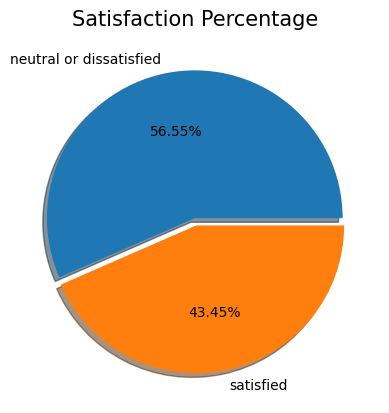

time: 88 ms (started: 2024-05-15 14:09:41 -07:00)


In [155]:
plt.pie(data['Satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Satisfaction Percentage', fontsize=15)
plt.show()

Piechart shows that 56.55% individuals are Neutral or Dissatisfied. while 43.45% passengers are satisfied.

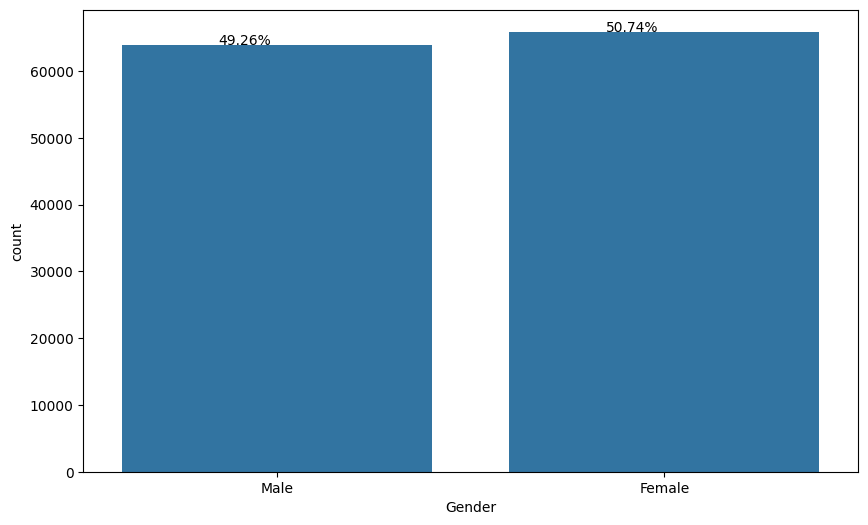

time: 232 ms (started: 2024-05-15 14:09:41 -07:00)


In [156]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=data,x='Gender')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

The data contains nearly the same percentage of males and females

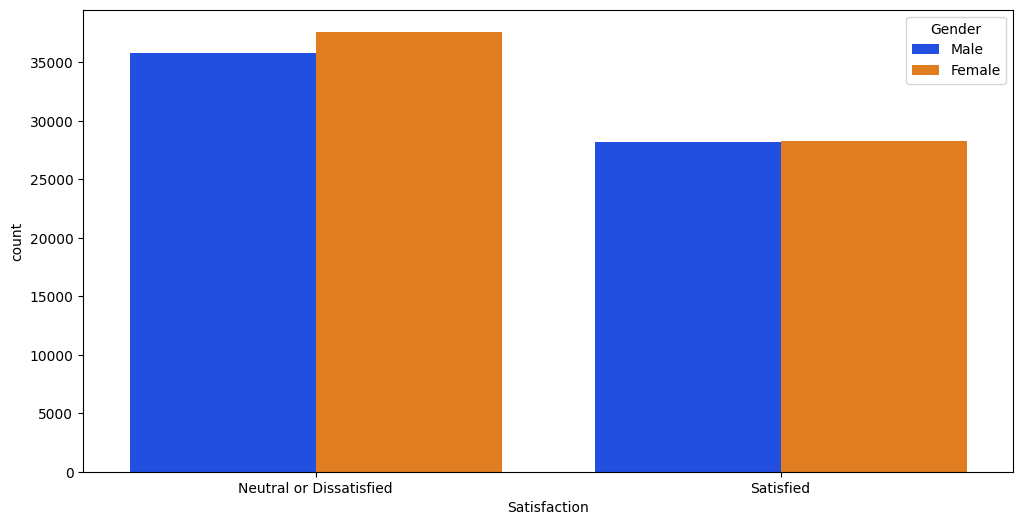

time: 283 ms (started: 2024-05-15 14:09:41 -07:00)


In [157]:
plt.figure(figsize = (12,6))
x=sns.countplot(data=data,x='Satisfaction',hue='Gender',palette='bright')
plt.show()

Both genders have a similar number of individuals who are satisfied, but there are slightly more females than males who are neutral or dissatisfied with the service or product. Overall, satisfaction levels appear quite balanced between the two genders.

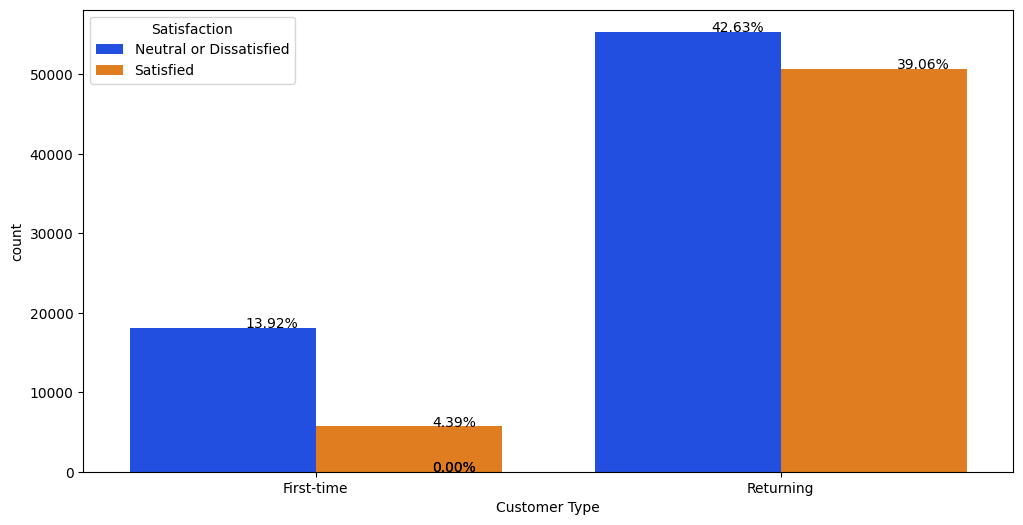

time: 284 ms (started: 2024-05-15 14:09:41 -07:00)


In [158]:
plt.figure(figsize = (12,6))
x=sns.countplot(data=data,x='Customer Type',hue='Satisfaction',palette='bright')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

A smaller proportion of first-time customers are satisfied (4.39%) compared to returning customers, where satisfaction is notably higher (39.06%). This suggests that returning customers tend to be more satisfied with the service or product than those experiencing it for the first time.

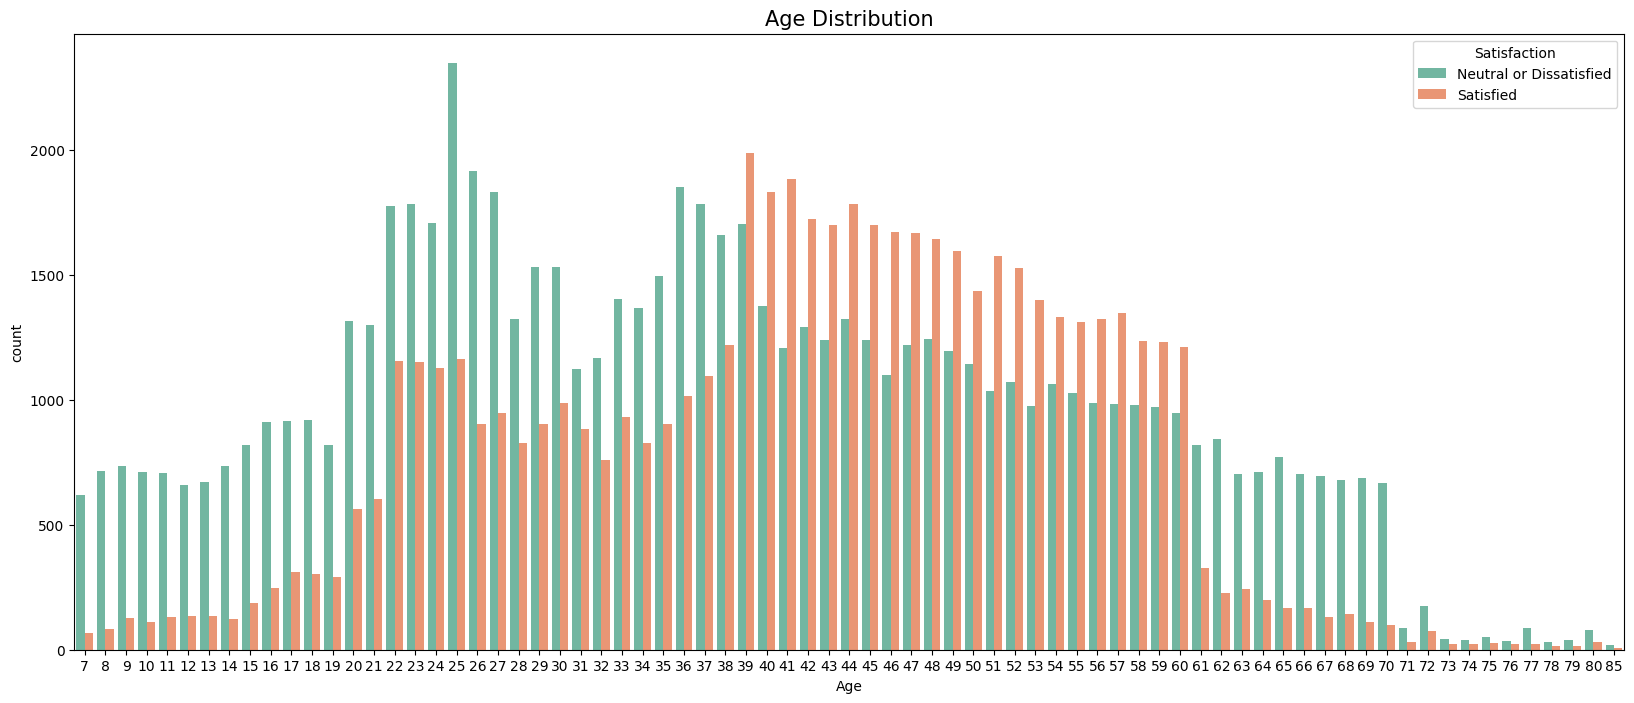

time: 456 ms (started: 2024-05-15 14:09:42 -07:00)


In [159]:

plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=data, palette="Set2", hue="Satisfaction")
plt.title('Age Distribution', fontsize=15)
plt.show()


people in minor age and youngers tend to be more dissatisfied while people aged from middle aged to sexagenarian tend to be more satisfied.

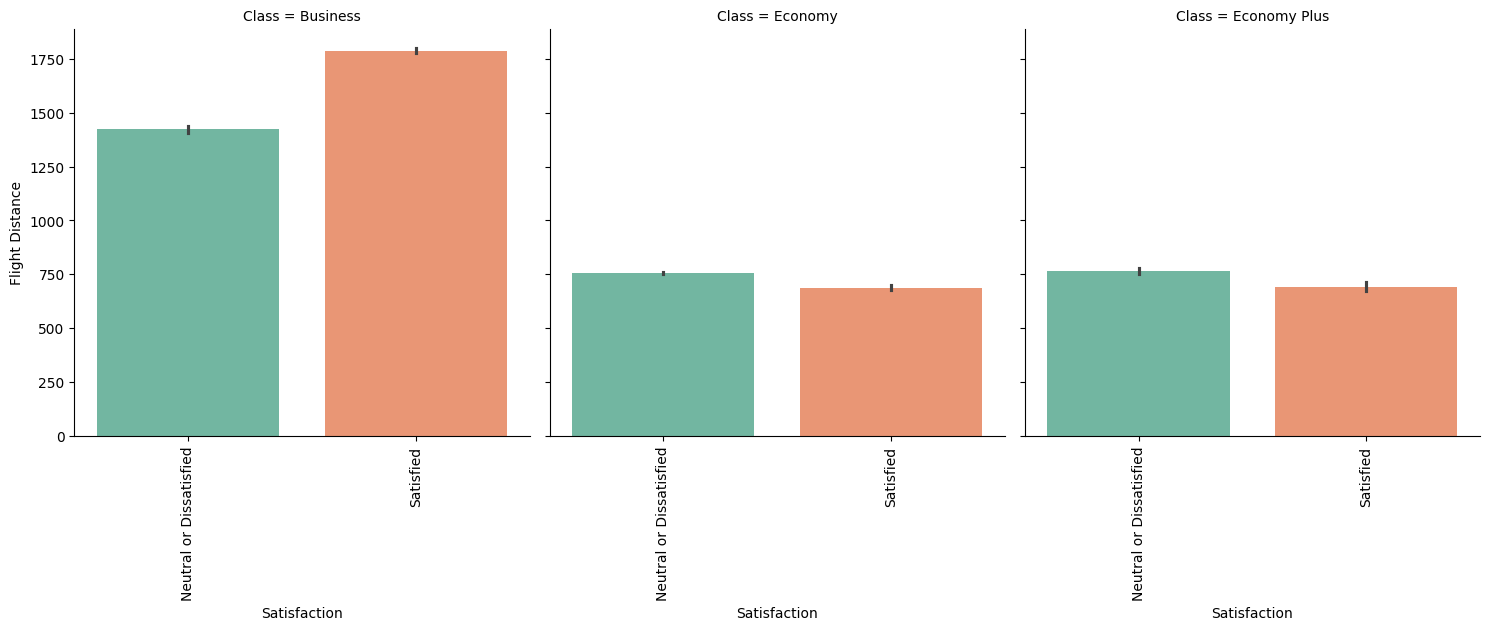

time: 1.3 s (started: 2024-05-15 14:09:42 -07:00)


In [160]:
g = sns.catplot(x="Satisfaction", y="Flight Distance", col="Class", data=data, kind="bar", hue="Satisfaction", palette='Set2')
g.set_xticklabels(rotation=90)

In business class customers tends to be more satisfied. While in economy and eco plus class, passengers are having the same ratio of satisfied and dissatisfied.

<Axes: xlabel='Seat Comfort', ylabel='count'>

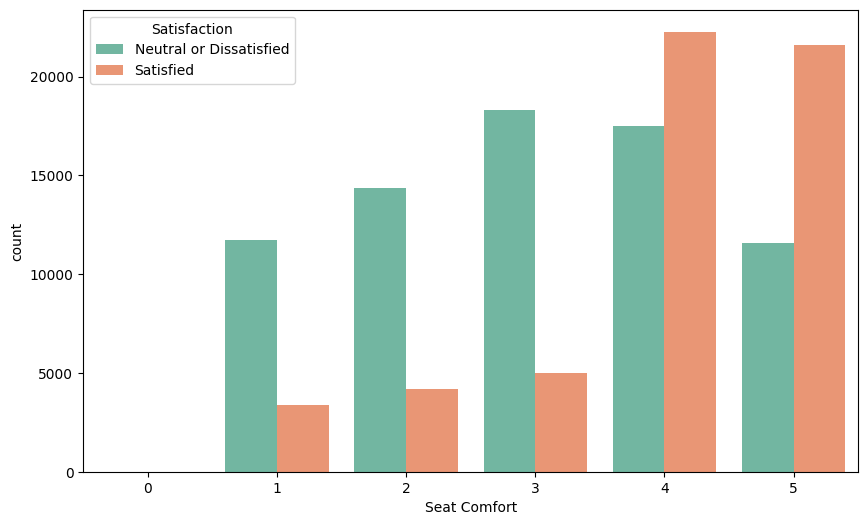

time: 251 ms (started: 2024-05-15 14:09:44 -07:00)


In [161]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Seat Comfort',hue='Satisfaction',palette='Set2')

Seat comfort within score 3 having the same results and surge the satisfaction after that.

<Axes: xlabel='Leg Room Service', ylabel='count'>

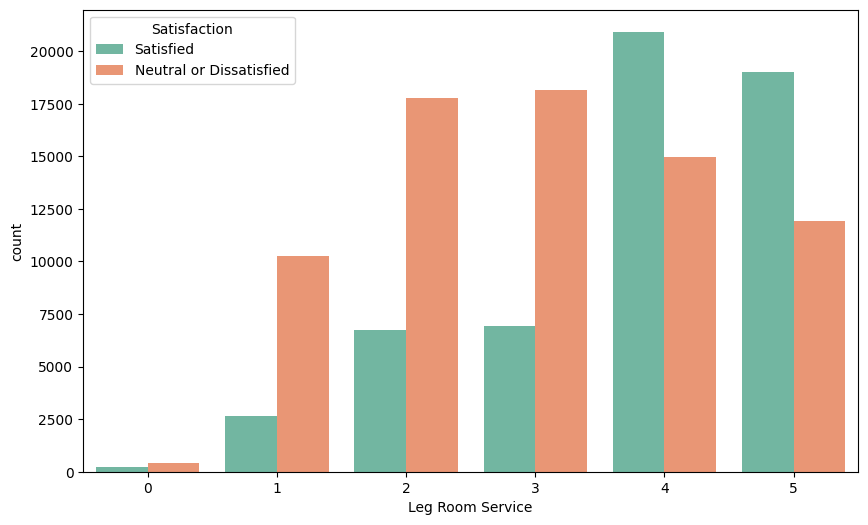

time: 259 ms (started: 2024-05-15 14:09:44 -07:00)


In [162]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Leg Room Service',hue='Satisfaction',palette='Set2')

Leg room service with score more than 3 provides good results.

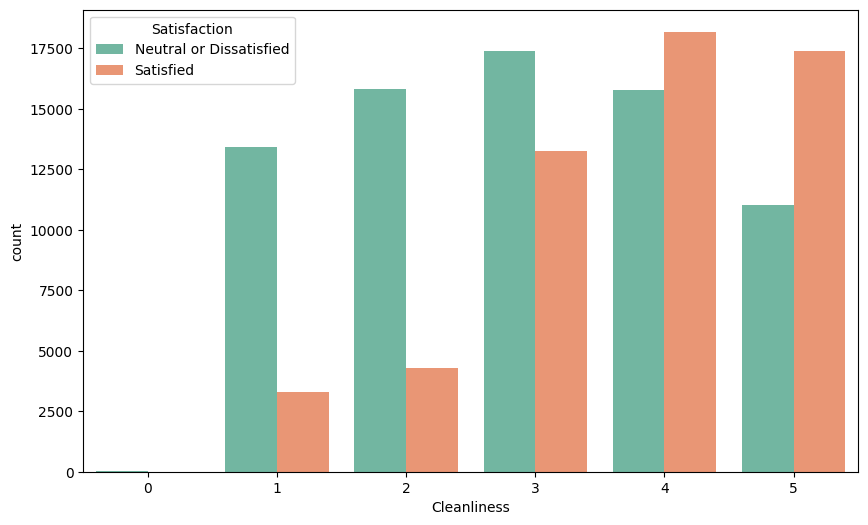

time: 255 ms (started: 2024-05-15 14:09:44 -07:00)


In [163]:

plt.figure(figsize = (10,6))
axx=sns.countplot(data=data,x='Cleanliness',hue='Satisfaction',palette='Set2')
# axx.bar_label(axx.containers[0])
# axx.bar_label(axx.containers[1])

Off course cleanliness plays a crucial role in passenger satisfaction.

<Axes: xlabel='Food and Drink', ylabel='count'>

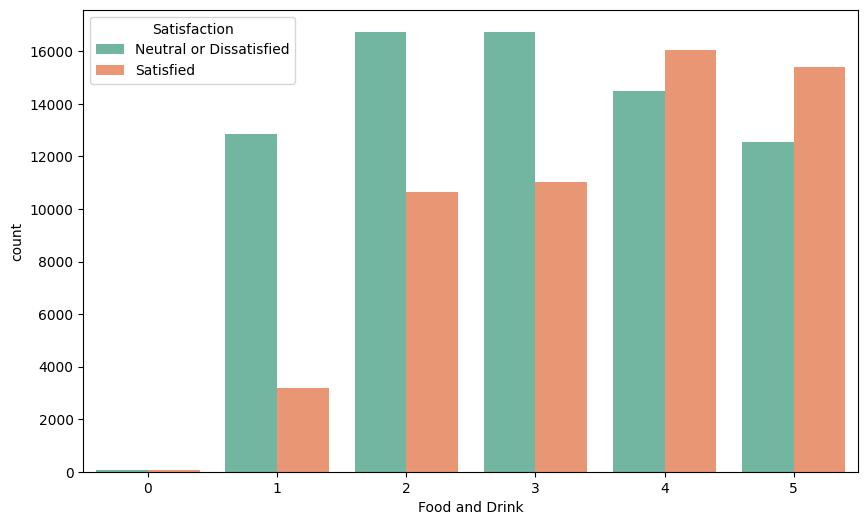

time: 262 ms (started: 2024-05-15 14:09:44 -07:00)


In [164]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Food and Drink',hue='Satisfaction',palette='Set2')

Food and drinks are not playing a major role to swing the customer satisfaction, because with 4 and 5 score of food/drinks not showing a big gap between satisfied and dissatisfied.

<Axes: xlabel='Baggage Handling', ylabel='count'>

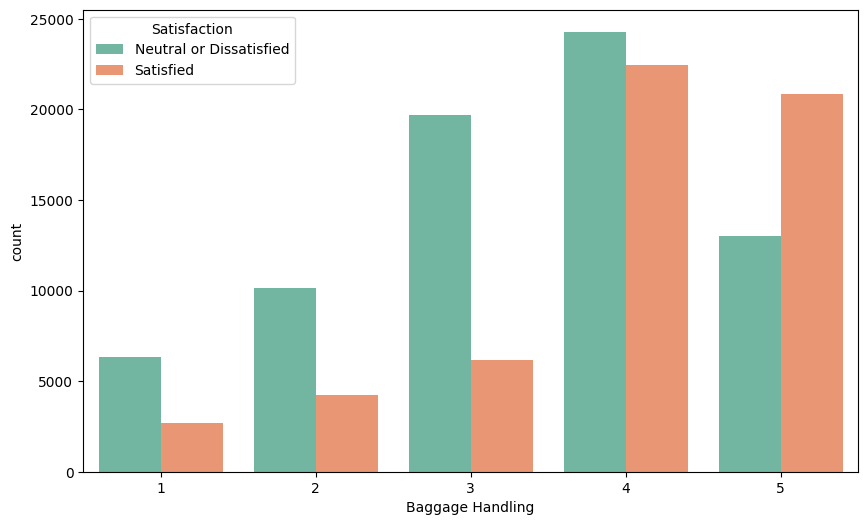

time: 248 ms (started: 2024-05-15 14:09:45 -07:00)


In [165]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Baggage Handling',hue='Satisfaction',palette='Set2')

good service in baggage handling can increase satisfaction rate.


# Outliers


# Detect Ouliers

ID                                            Axes(0.125,0.77;0.168478x0.11)
Age                                        Axes(0.327174,0.77;0.168478x0.11)
Flight Distance                            Axes(0.529348,0.77;0.168478x0.11)
Departure Delay                            Axes(0.731522,0.77;0.168478x0.11)
Arrival Delay                                Axes(0.125,0.638;0.168478x0.11)
Departure and Arrival Time Convenience    Axes(0.327174,0.638;0.168478x0.11)
Ease of Online Booking                    Axes(0.529348,0.638;0.168478x0.11)
Check-in Service                          Axes(0.731522,0.638;0.168478x0.11)
Online Boarding                              Axes(0.125,0.506;0.168478x0.11)
Gate Location                             Axes(0.327174,0.506;0.168478x0.11)
On-board Service                          Axes(0.529348,0.506;0.168478x0.11)
Seat Comfort                              Axes(0.731522,0.506;0.168478x0.11)
Leg Room Service                             Axes(0.125,0.374;0.168478x0.11)

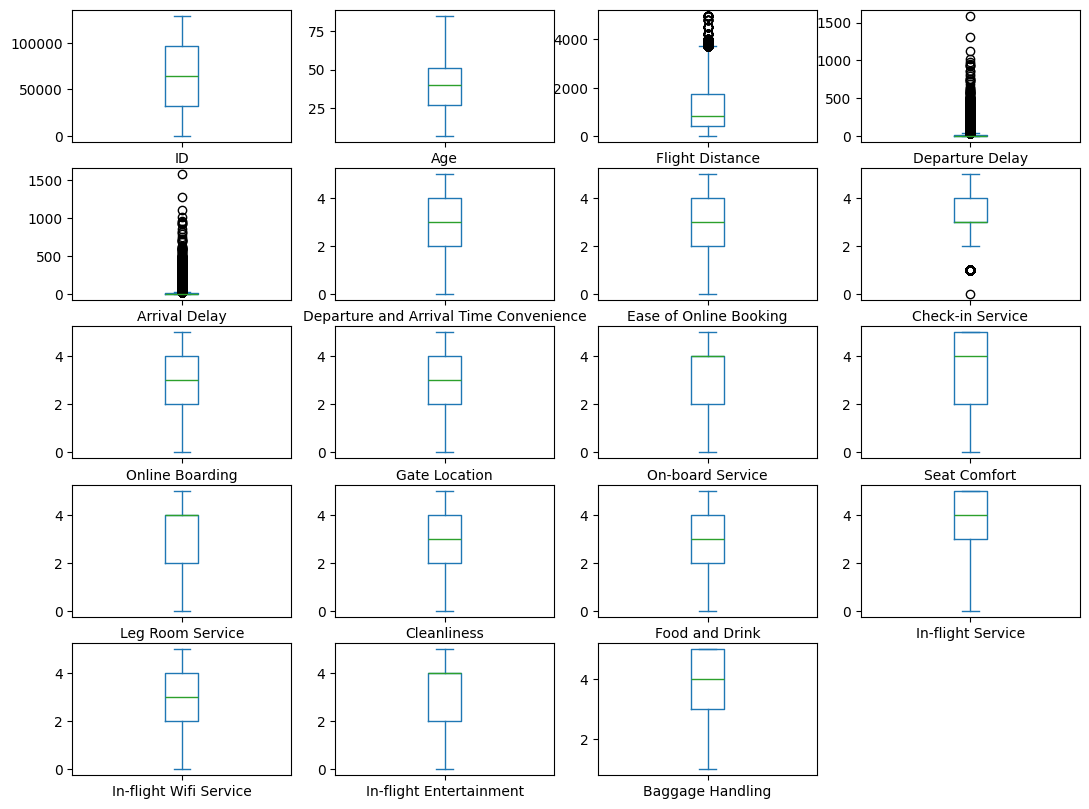

time: 580 ms (started: 2024-05-15 14:09:45 -07:00)


In [166]:
data.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

**Replacing Outliers

In [167]:
Q1 = (data[['Departure Delay','Arrival Delay']]).quantile(0.25)
Q3 = (data[['Departure Delay','Arrival Delay']]).quantile(0.75)
IQR = Q3-Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)
print(max)
print(min)


data['Departure Delay'].mask(data['Departure Delay']>max['Departure Delay'],max['Departure Delay'],inplace=True)
data['Arrival Delay'].mask(data['Arrival Delay']>max['Arrival Delay'],max['Arrival Delay'],inplace=True)


Departure Delay    30.0
Arrival Delay      32.5
dtype: float64
Departure Delay   -18.0
Arrival Delay     -19.5
dtype: float64
time: 10.2 ms (started: 2024-05-15 14:09:45 -07:00)


In [168]:
data.shape

(129880, 24)

time: 695 µs (started: 2024-05-15 14:09:45 -07:00)


Droping ID feature as it is not contributing towards target prediction.

In [169]:
data.drop('ID',axis=1,inplace=True)

time: 10.2 ms (started: 2024-05-15 14:09:45 -07:00)


#LABEL ENCODING for Categorical variables

Here we are converting object features to numeric values.

In [170]:
for column in data.columns:
    if data[column].dtype == np.number: continue

    data[column] = LabelEncoder().fit_transform(data[column])

time: 140 ms (started: 2024-05-15 14:09:45 -07:00)


In [171]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,41,0,0,0,693,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,4,0
1,0,28,1,0,0,693,26,32.5,2,2,3,5,2,5,4,5,5,3,5,2,5,4,1
2,1,34,1,0,0,725,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,2,1
3,1,43,1,0,0,1720,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,4,1
4,0,42,1,0,0,3285,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,2,1


time: 4.26 ms (started: 2024-05-15 14:09:46 -07:00)


# Correlation among variables

In [172]:
correlations = data.corr()['Satisfaction'].sort_values(ascending=False)
pd.set_option('display.max_columns', None)

print(correlations.to_string())

Satisfaction                              1.000000
Online Boarding                           0.501749
In-flight Entertainment                   0.398234
Seat Comfort                              0.348829
On-board Service                          0.322205
Leg Room Service                          0.312424
Cleanliness                               0.307035
Flight Distance                           0.298198
In-flight Wifi Service                    0.283460
Baggage Handling                          0.248680
In-flight Service                         0.244918
Check-in Service                          0.237252
Food and Drink                            0.211340
Customer Type                             0.186017
Ease of Online Booking                    0.168877
Age                                       0.134131
Gender                                    0.011236
Gate Location                            -0.002793
Departure and Arrival Time Convenience   -0.054270
Departure Delay                

Online Boarding, In-Flight entertainment and seat comfort were the top three features contributing to Satisfaction.

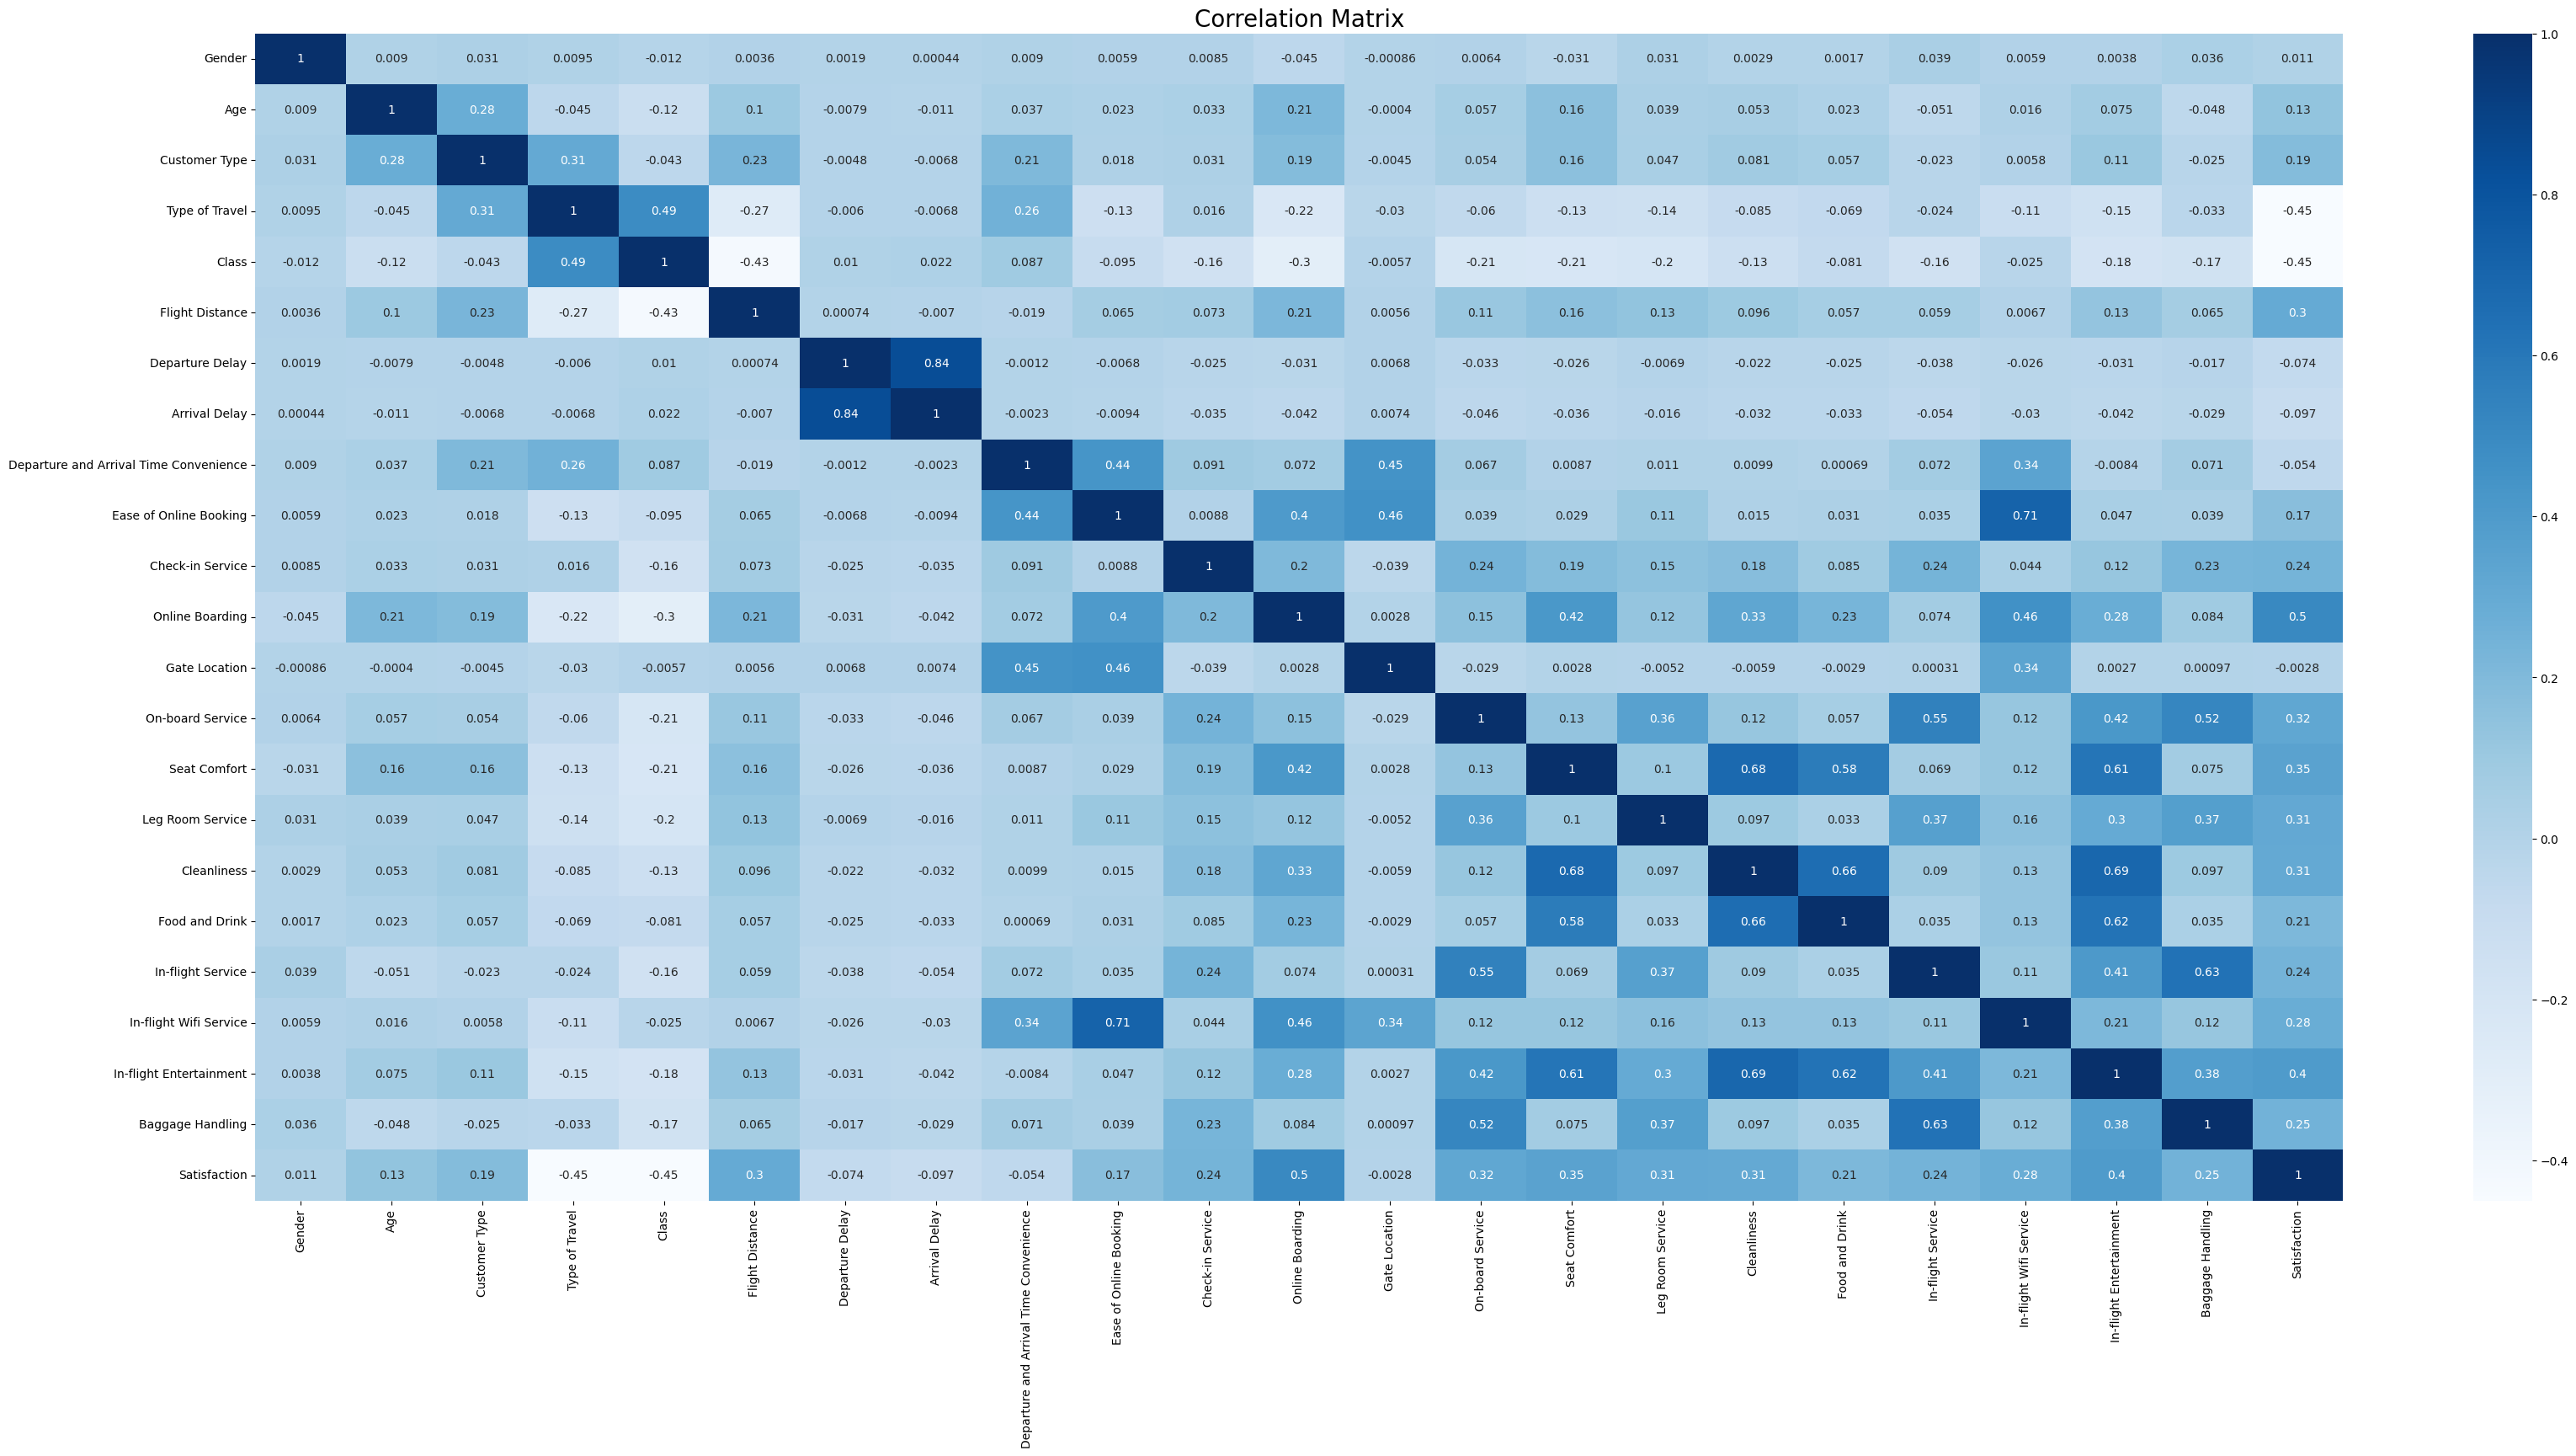

time: 1.08 s (started: 2024-05-15 14:09:46 -07:00)


In [173]:
corr = data.corr()


plt.figure(figsize=(40, 18))
sns.heatmap(corr, annot=True, cmap='Blues')

plt.title('Correlation Matrix', fontsize=20)

plt.show()

Ease of online boarding and In flight wifi service is having corelation. Cleanliness and Entertainment having corelation, too. Which is showing that In most flights such services are common with one another. And we have to check multicolinearity in this dataset.

**Corelation using VIF**

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variables'] = data.columns
vif['VIF Factor'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

time: 2.96 s (started: 2024-05-15 14:09:47 -07:00)


In [175]:
vif

,variables,VIF Factor
0,Gender,1.960837
1,Age,6.177706
2,Customer Type,8.678068
3,Type of Travel,3.080949
4,Class,2.822857
5,Flight Distance,2.901078
6,Departure Delay,4.866379
7,Arrival Delay,4.913466
8,Departure and Arrival Time Convenience,8.368208
9,Ease of Online Booking,13.245150


time: 9.72 ms (started: 2024-05-15 14:09:50 -07:00)


Lets remove the In-flight Entertainment	feature to remove multi colinearity.
Arrival Delay and Departure delay are having high corelation, so that we are removing one of them.

In [176]:
df1=data.copy()


time: 16.2 ms (started: 2024-05-15 14:09:50 -07:00)


In [177]:
df1.drop('In-flight Entertainment',axis=1,inplace=True)
df1.drop('Arrival Delay',axis=1,inplace=True)

time: 8.87 ms (started: 2024-05-15 14:09:50 -07:00)


# Model Fitting

In [178]:
x = df1.drop(['Satisfaction'] , axis = 1).values
y= df1['Satisfaction' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

time: 15.2 ms (started: 2024-05-15 14:09:50 -07:00)


In [179]:
x.shape

(129880, 20)

time: 1.39 ms (started: 2024-05-15 14:09:50 -07:00)


In [180]:
y.shape

(129880,)

time: 1.47 ms (started: 2024-05-15 14:09:50 -07:00)


In [181]:
print("Shape of X_train is:", x_train.shape)
print("Shape of X_test is:", x_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (103904, 20)
Shape of X_test is: (25976, 20)
Shape of y_train is: (103904,)
Shape of y_test is: (25976,)
time: 591 µs (started: 2024-05-15 14:09:50 -07:00)


## Logistic Regression

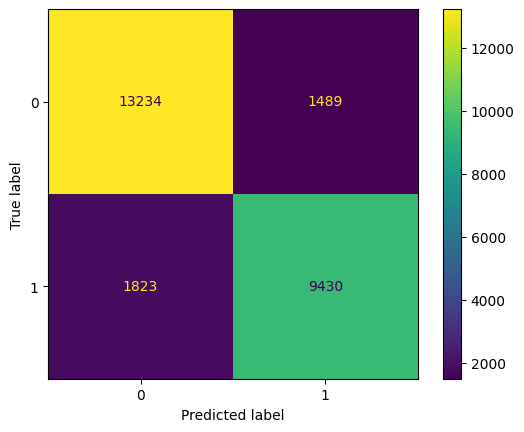

time: 5.31 s (started: 2024-05-15 14:09:50 -07:00)


In [182]:


model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)

y_pred=model_lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_).plot()

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.86      0.84      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

time: 38.9 ms (started: 2024-05-15 14:09:55 -07:00)


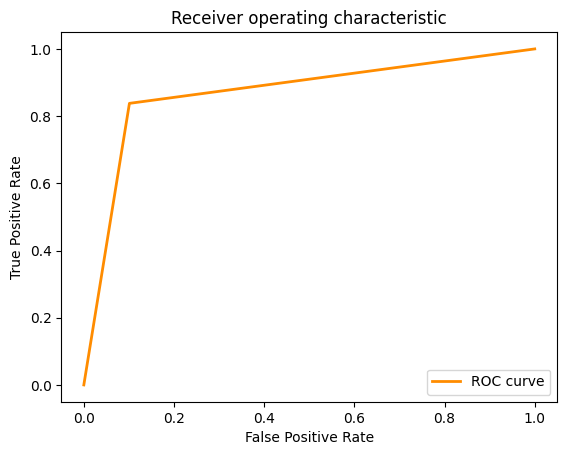

time: 93.6 ms (started: 2024-05-15 14:09:55 -07:00)


In [184]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

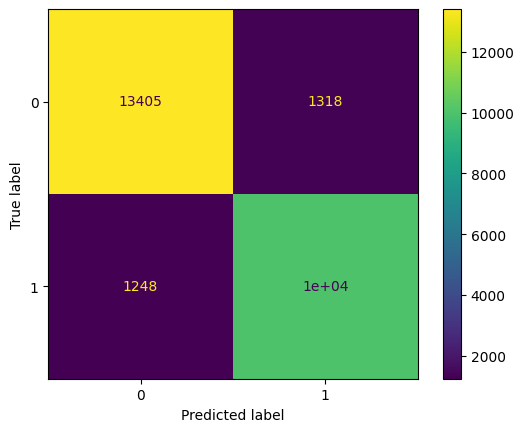

time: 259 ms (started: 2024-05-15 14:09:55 -07:00)


In [185]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_).plot()

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     14723
           1       0.88      0.89      0.89     11253

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976

time: 30 ms (started: 2024-05-15 14:09:56 -07:00)


Increasing depth

In [187]:
model_dt = DecisionTreeClassifier(max_depth=8)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14723
           1       0.94      0.92      0.93     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

time: 290 ms (started: 2024-05-15 14:09:56 -07:00)


In [188]:
model_dt = DecisionTreeClassifier(max_depth=10)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14723
           1       0.95      0.92      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.95     25976
weighted avg       0.95      0.95      0.95     25976

time: 331 ms (started: 2024-05-15 14:09:56 -07:00)


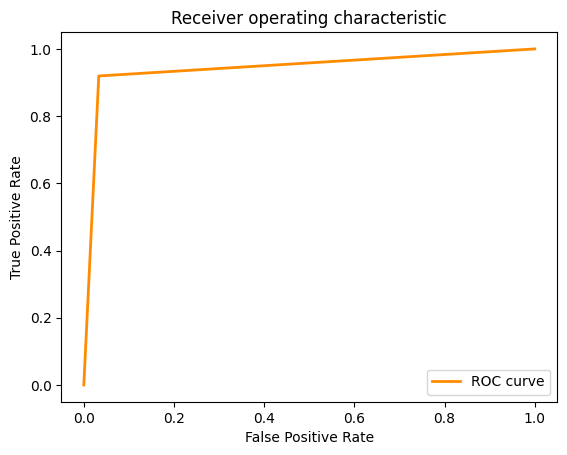

time: 68.1 ms (started: 2024-05-15 14:09:56 -07:00)


In [189]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Naive bayes


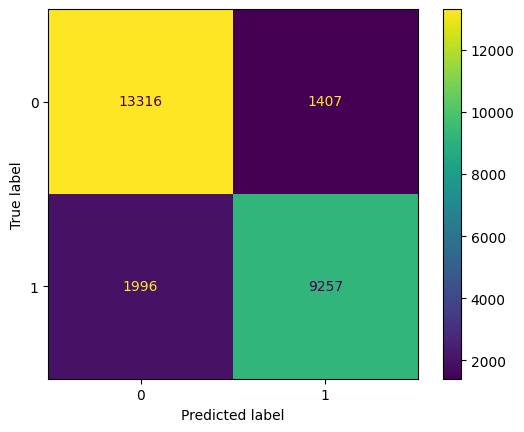

time: 101 ms (started: 2024-05-15 14:09:56 -07:00)


In [190]:

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

y_pred = model_nb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nb.classes_).plot()

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14723
           1       0.87      0.82      0.84     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976

time: 26.5 ms (started: 2024-05-15 14:09:56 -07:00)


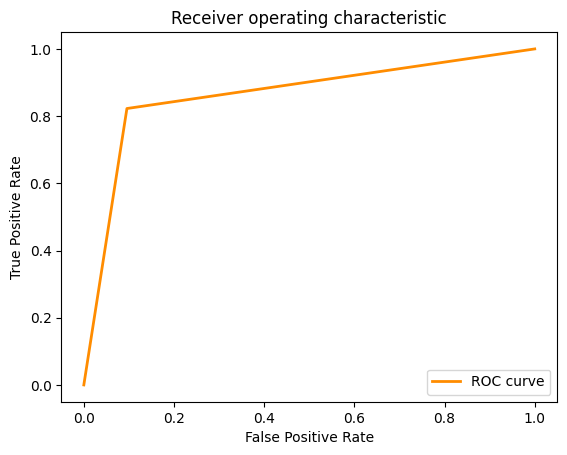

time: 70.6 ms (started: 2024-05-15 14:09:56 -07:00)


In [192]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbor Classifier

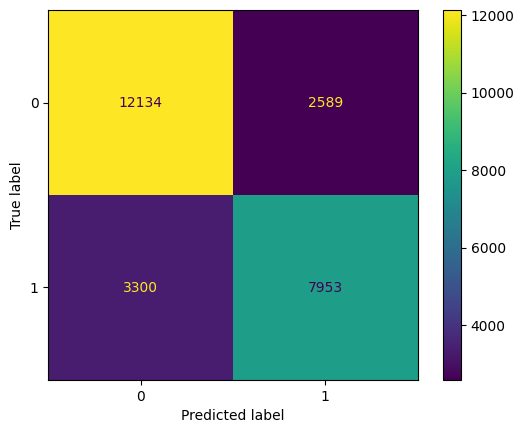

time: 1min 2s (started: 2024-05-15 14:09:57 -07:00)


In [193]:


model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

y_pred = model_knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_).plot()


In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     14723
           1       0.75      0.71      0.73     11253

    accuracy                           0.77     25976
   macro avg       0.77      0.77      0.77     25976
weighted avg       0.77      0.77      0.77     25976

time: 24.8 ms (started: 2024-05-15 14:10:59 -07:00)


Changing n to 8

In [195]:


model_knn = KNeighborsClassifier(n_neighbors=8)
model_knn.fit(x_train, y_train)

y_pred = model_knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     14723
           1       0.79      0.63      0.70     11253

    accuracy                           0.77     25976
   macro avg       0.77      0.75      0.75     25976
weighted avg       0.77      0.77      0.76     25976

time: 44.3 s (started: 2024-05-15 14:10:59 -07:00)


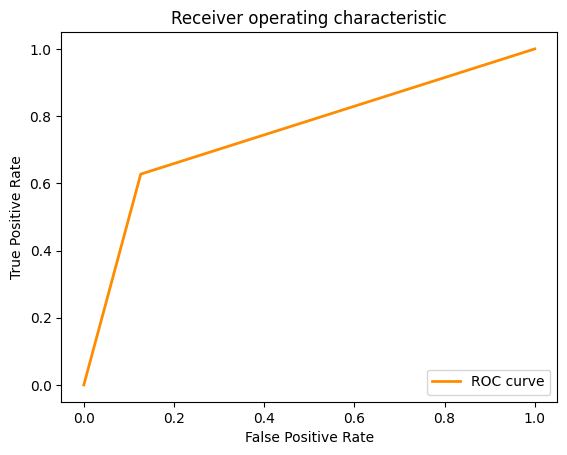

time: 70.3 ms (started: 2024-05-15 14:11:43 -07:00)


In [196]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## SVC

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     14723
           1       0.86      0.80      0.83     11253

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.85     25976
weighted avg       0.86      0.86      0.86     25976



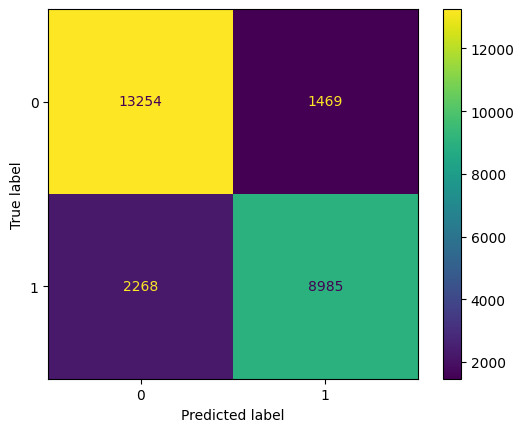

time: 4min 32s (started: 2024-05-15 14:11:43 -07:00)


In [197]:
model_svc=SVC(C=50)

model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svc.classes_).plot()

print(classification_report(y_test,y_pred))

In [198]:
model_svc=SVC(C=100)
model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14723
           1       0.87      0.81      0.84     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.86     25976

time: 3min 54s (started: 2024-05-15 14:16:15 -07:00)


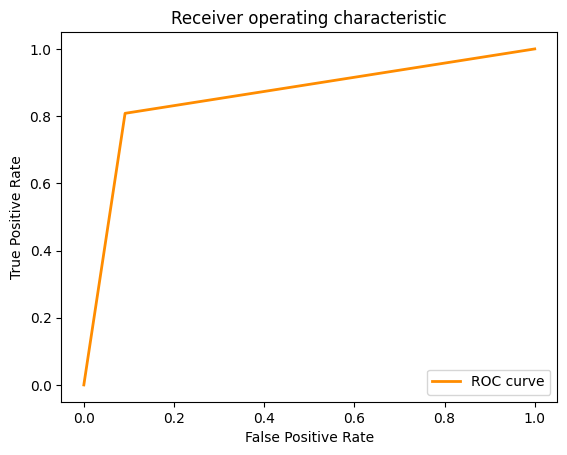

time: 67.7 ms (started: 2024-05-15 14:20:09 -07:00)


In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## MLP classifier

Lets use neural network model

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14723
           1       0.96      0.93      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



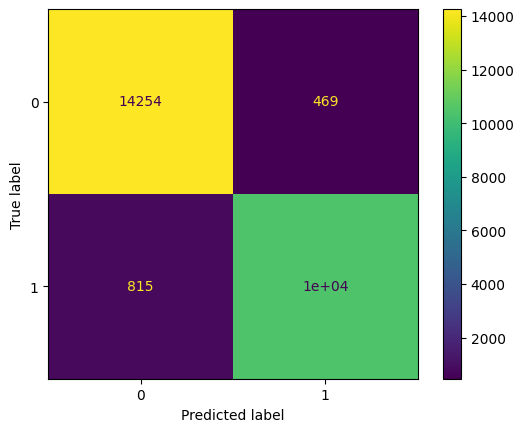

time: 2min 42s (started: 2024-05-15 14:20:10 -07:00)


In [200]:
model_mlp = MLPClassifier(hidden_layer_sizes=(256,100,), activation='relu', solver='adam', max_iter=1000)

model_mlp.fit(x_train, y_train)
y_pred = model_mlp.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_mlp.classes_).plot()

print(classification_report(y_test,y_pred))

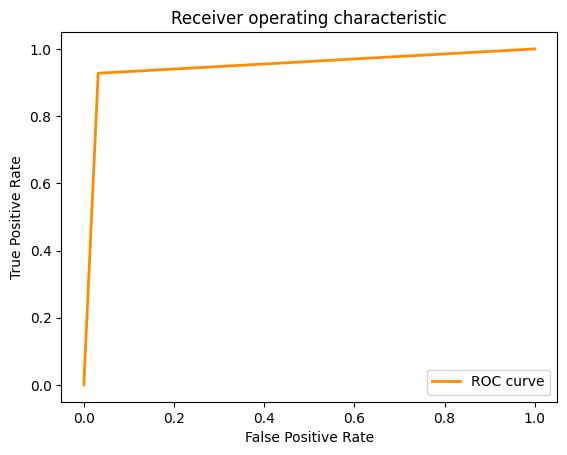

time: 114 ms (started: 2024-05-15 14:22:52 -07:00)


In [201]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Multi layered perceptron is giving the good performance with 95% accuarcy.

# Ensemble Models

## Random Forest

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



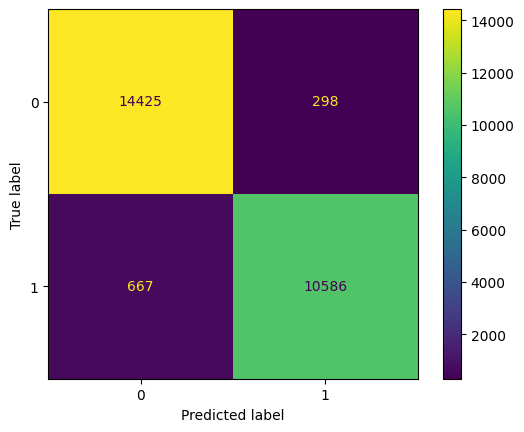

time: 8.08 s (started: 2024-05-15 14:22:52 -07:00)


In [202]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

y_pred=model_rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svc.classes_).plot()

print(classification_report(y_test,y_pred))

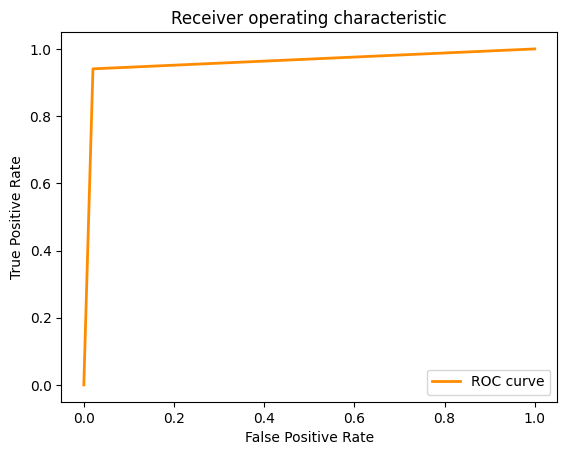

time: 64.9 ms (started: 2024-05-15 14:23:00 -07:00)


In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Bagging

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     14723
           1       0.84      0.91      0.87     11253

    accuracy                           0.88     25976
   macro avg       0.88      0.89      0.88     25976
weighted avg       0.89      0.88      0.88     25976



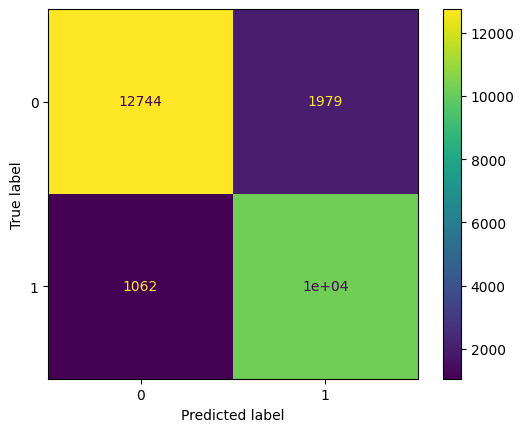

time: 1.75 s (started: 2024-05-15 14:23:01 -07:00)


In [204]:
model_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=20, random_state=1)
model_bagging.fit(x_train, y_train)

y_pred=model_bagging.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svc.classes_).plot()

print(classification_report(y_test,y_pred))

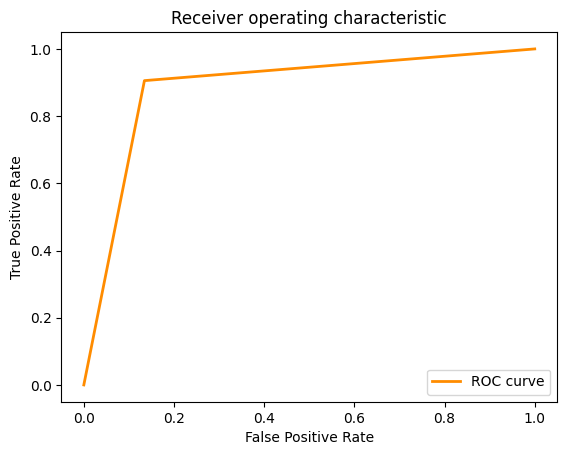

time: 69.7 ms (started: 2024-05-15 14:23:02 -07:00)


In [205]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Boosting

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14723
           1       0.96      0.94      0.95     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



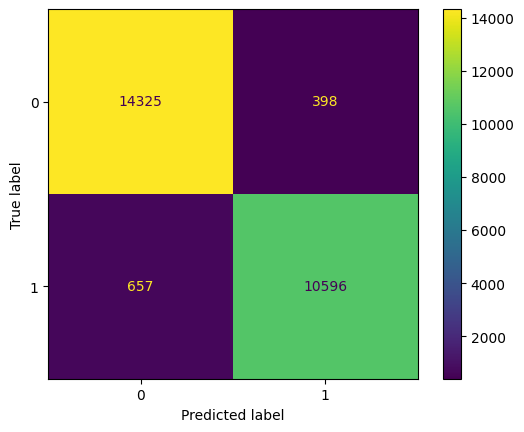

time: 8min 20s (started: 2024-05-15 14:23:02 -07:00)


In [206]:
model_ada=AdaBoostClassifier(estimator=RandomForestClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=200, random_state=1)

model_ada.fit(x_train,y_train)

y_pred=model_ada.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svc.classes_).plot()

print(classification_report(y_test,y_pred))

Taking too much time to train the model, because in adaboost it traverse the entire tree in every turn.

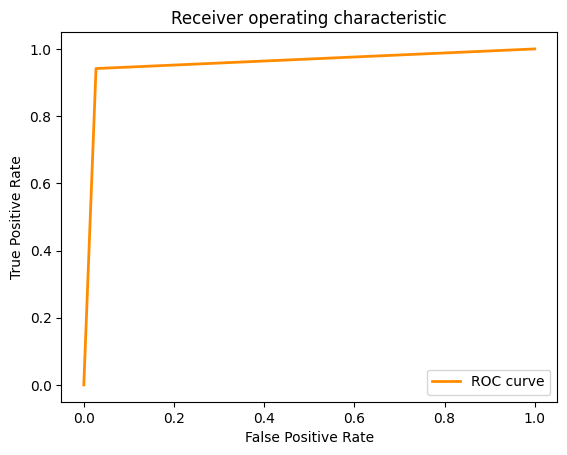

time: 65.6 ms (started: 2024-05-15 14:31:23 -07:00)


In [207]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Voting classifier

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14723
           1       0.93      0.81      0.87     11253

    accuracy                           0.89     25976
   macro avg       0.90      0.88      0.89     25976
weighted avg       0.90      0.89      0.89     25976



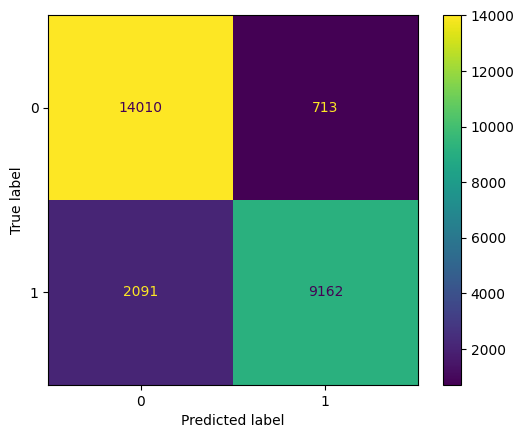

time: 45.4 s (started: 2024-05-15 14:31:23 -07:00)


In [208]:
clf1 = LogisticRegression(max_iter=200)
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()
clf4 = KNeighborsClassifier()



voting = VotingClassifier(estimators=[
    ('lr', clf1), ('svc', clf2), ('dt', clf3), ('knn', clf4)
], voting='hard')


voting.fit(x_train, y_train)

y_pred = voting.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=voting.classes_).plot()
print(classification_report(y_test, y_pred))

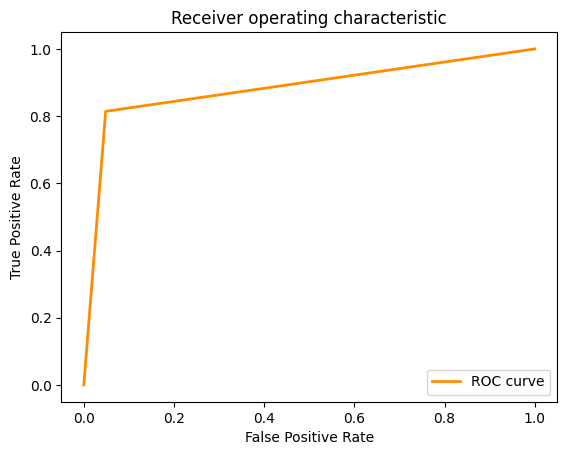

time: 68.7 ms (started: 2024-05-15 14:32:09 -07:00)


In [209]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting using Gridsearch

In [210]:
from sklearn.model_selection import GridSearchCV
model_gbc= GradientBoostingClassifier()

para={'n_estimators':[200,250,300],
       'learning_rate':[0.01,0.1],
       'max_depth':[4,5]}

gscv=GridSearchCV(estimator=model_gbc,
                 param_grid=para,
                 scoring='accuracy',
                 cv=5,
                 verbose=3)

time: 6.26 ms (started: 2024-05-15 14:32:09 -07:00)


In [211]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.914 total time=  23.9s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.919 total time=  24.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.910 total time=  24.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.917 total time=  24.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.915 total time=  24.2s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=250;, score=0.926 total time=  30.2s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=250;, score=0.930 total time=  30.3s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=250;, score=0.922 total time=  30.3s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=250;, score=0.929 total time=  30.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=250;, score=0.92

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 5],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy', verbose=3)

time: 29min 9s (started: 2024-05-15 14:32:09 -07:00)


In [212]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

time: 4.62 ms (started: 2024-05-15 16:48:02 -07:00)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



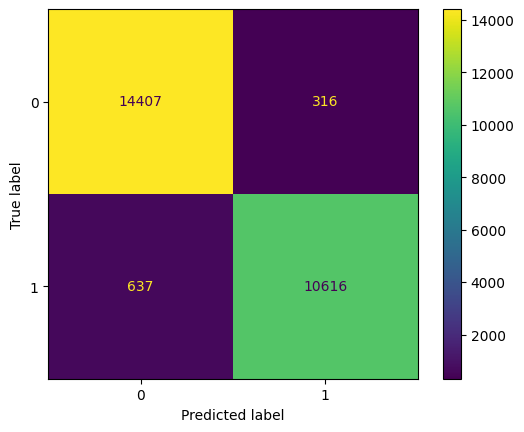

time: 39.5 s (started: 2024-05-15 16:48:02 -07:00)


In [213]:
model_gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=0)
model_gbc.fit(x_train, y_train)

y_pred=model_gbc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svc.classes_).plot()

print(classification_report(y_test,y_pred))

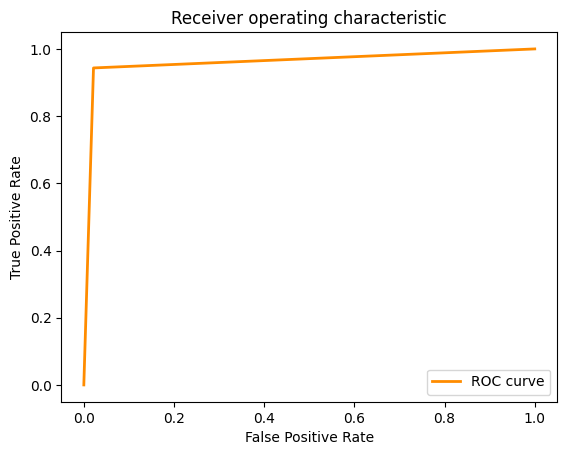

time: 53.3 ms (started: 2024-05-15 16:48:41 -07:00)


In [214]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## XGBOOST

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.95      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



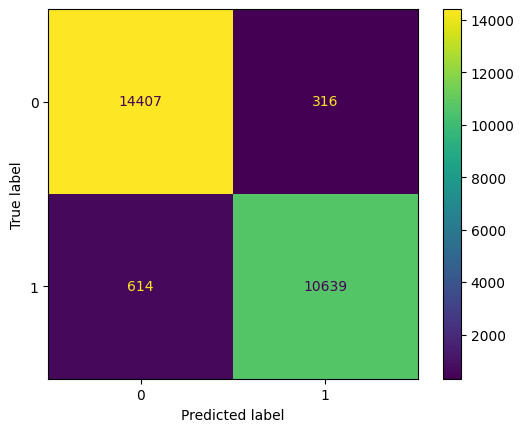

time: 357 ms (started: 2024-05-15 16:48:41 -07:00)


In [215]:


model_xgb= xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred= model_xgb.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_).plot()

print(classification_report(y_test,y_pred))

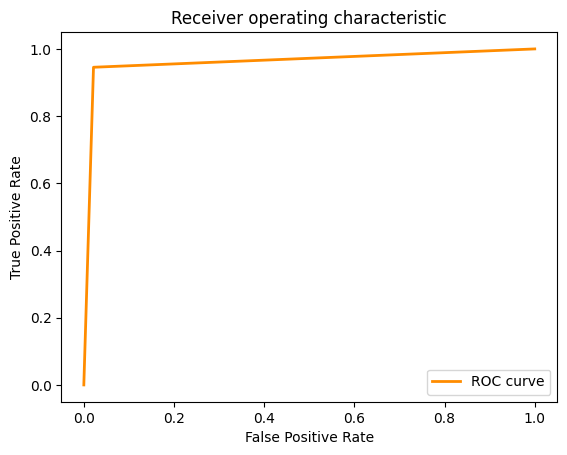

time: 53.7 ms (started: 2024-05-15 16:48:42 -07:00)


In [216]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## SHAP ANALYSIS


Shap is a popular AI package using which we can infer which features contributing our model decisions and how they contributing. It also shows local and general prediction path.


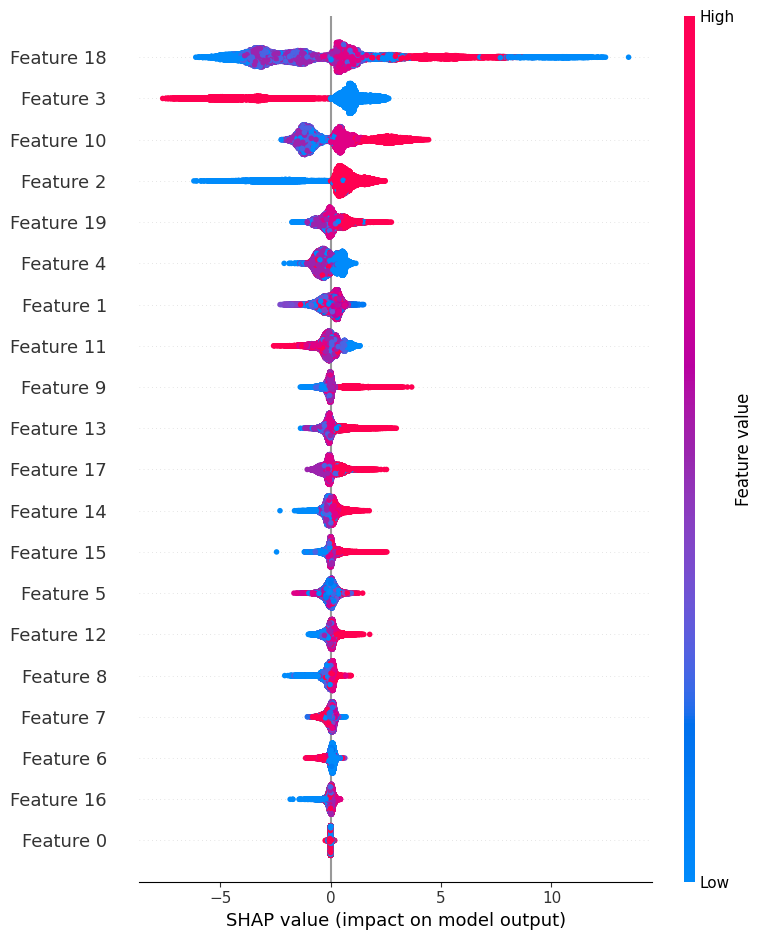

time: 2.71 s (started: 2024-05-15 16:48:42 -07:00)


In [217]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer.shap_values(x_test)



shap.summary_plot(shap_values, x_test)


Feature 18 (In-flight Wifi Service), Feature 3 (Type of Travel), and Feature 10 (Online Boarding) appear to be highly impactful, showing a large dispersion of SHAP values and differing by high and low feature values. Features like Feature 0 (Gender) and Feature 16 (Food and Drink) are lower on the plot, indicating they are less impactful on the model's prediction.



# Comparing models

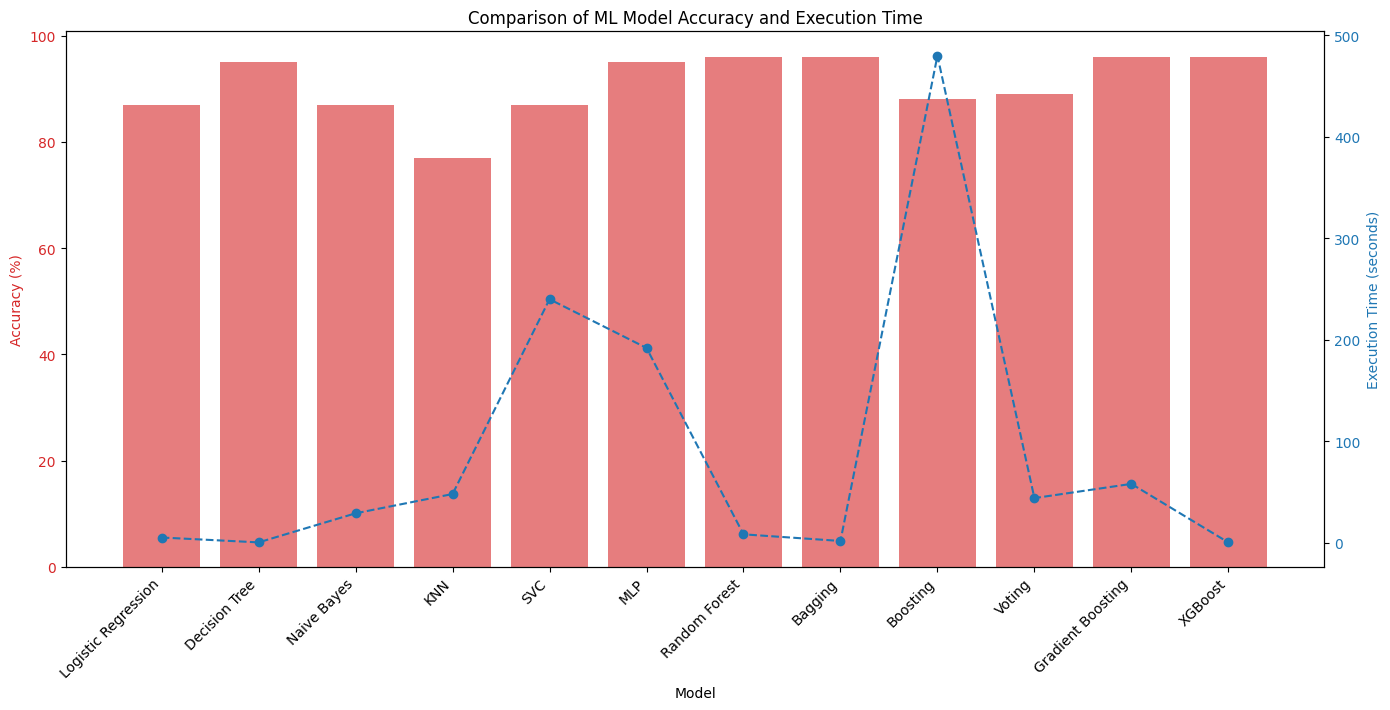

time: 125 ms (started: 2024-05-15 16:48:44 -07:00)


In [218]:
models = [
    "Logistic Regression", "Decision Tree", "Naive Bayes", "KNN",
    "SVC","MLP", "Random Forest", "Bagging", "Boosting", "Voting",
    "Gradient Boosting", "XGBoost"
]
accuracy = [87, 95, 87, 77, 87,95, 96, 96, 88, 89, 96, 96]
execution_time = [5.13, 0.331e-3, 29e-3, 48, 240,192 ,8.27, 1.73, 480, 44, 58, 0.273e-3]

execution_time_seconds = [time if time > 1 else time * 1e3 for time in execution_time]

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(models, accuracy, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(models, rotation=45, ha="right")

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Execution Time (seconds)', color=color)
ax2.plot(models, execution_time_seconds, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of ML Model Accuracy and Execution Time')
plt.show()

In [219]:
model_data = {
    "Model": models,
    "Accuracy (%)": accuracy,
    "Execution Time (seconds)": execution_time_seconds
}

models_info = pd.DataFrame(model_data)

models_info

,Model,Accuracy (%),Execution Time (seconds)
0,Logistic Regression,87,5.130
1,Decision Tree,95,0.331
2,Naive Bayes,87,29.000
3,KNN,77,48.000
4,SVC,87,240.000
5,MLP,95,192.000
6,Random Forest,96,8.270
7,Bagging,96,1.730
8,Boosting,88,480.000
9,Voting,89,44.000


time: 14.5 ms (started: 2024-05-15 16:48:44 -07:00)


Logistic Regression is quite straightforward and effective for basic classification problems, achieving an accuracy of 87% with a moderate execution time of about 5 seconds.

Decision Tree is extremely fast, running in just about 0.33 milliseconds, and it's highly accurate at 95%. This model makes decisions by creating a tree-like model of simple rules, which makes it very efficient for clear-cut tasks.

Naive Bayes also has an accuracy of 87% and operates quickly, taking about 29 milliseconds. It works well with large datasets and is based on applying Bayes' theorem, assuming that the features are independent of each other.

KNN (K-Nearest Neighbors) is simpler but slower, with a 77% accuracy and taking 48 seconds to run.

SVC (Support Vector Machine) offers robust accuracy at 87%, but is much slower, taking 4 minutes.

MLP Multi-layer perceptron is complex neural network, which performed well with accuracy of 95%.

Random Forest ensemble methods that provide high accuracy of 96%. Random Forest takes about 8.27 seconds, whereas Bagging with 88% is faster at 1.73 seconds. These methods build multiple decision trees and merge them together to get a more accurate and stable prediction.

Boosting and Gradient Boosting are both advanced ensemble techniques that focus on converting weak learners into strong ones, both achieving an accuracy of 96%. However, Boosting is particularly slow at 8 minutes, while Gradient Boosting takes about 58 seconds.

XGBoost is another type of boosting that is incredibly fast, executing in just 0.273 milliseconds, and it matches the high accuracy of 96%. It's known for its performance and speed.

Voting is a model that combines predictions from multiple other models to make a final decision, achieving an 89% accuracy in a relatively moderate time of 44 seconds. It uses the of multiple models to improve accuracy.

---

# Conclusion and Discussion

 Overall, It can be conclude that Ensemble methods were having the best performance compare to classification models. While, Decision tree and MLP were having the competitive accuracy. Removing intra corelated columns and less corelated features ends up with pretty good performance.

 Points of suggestions to airline industry:

 -> Gender does not related to satisfaction, means gender based promos or offers should be discontinued.

 -> Age matters here. We noticed more negative rating on younger aged customers. Offers or discounts for youngers or students can increase the rate.

 ->First time users experienced more dissatisfaction. Can be due to some complexities in the system. easiness or guidance for them are suggested.

 ->Moreover, other services like baggage handling, online booking, seat comfort and legroom all are playing a crucial role in customer retention.

 ->Cleanliness and high quality food service are also recommended.

---

